# Taqiya Ehsan
# Programming Exercise \#3
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive

# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
# %cd /content/drive/My\ Drive/[MY PATH] ###

Mounted at /content/drive


In [1]:
# import relevant Python libraries
### Your import commands go here ###
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Non-centered Data and Principal Component Analysis (PCA)**

## 1.1

In [3]:
### Your code for 1.1 goes here ###
A = np.random.randn(3, 2)
c = np.random.normal(0, np.sqrt(3), (3, 1))
print(f'A = {A}')
print(f'c = {c}')

A = [[ 1.2347528  -2.1653595 ]
 [-0.96538906 -2.79529882]
 [-1.1283164  -1.42341097]]
c = [[ 2.37600741]
 [-0.08630486]
 [-0.27212963]]


## 1.2

In [4]:
### Your code for 1.2 goes here ###
X_T = np.zeros([3, 250])

for ctr in range(250):
  b_i = np.random.randn(2, 1)
  X_T[:, [ctr]] = (np.matmul(A, b_i)) + c

X = np.transpose(X_T)
# X (250, 3) --> each row is a data sample

## 1.3

In [5]:
### Your code for 1.3 goes here ###
np.linalg.matrix_rank(X)

3

## 1.4

_[Your answer for 1.4 goes here]_

1. **c** = **-[mean vector of X]** could be a possible vector that guarantees centered data matrix **X**. This **c** is the mean of the matrix generated by doing A*b_i as before. So, we're essentially subtracting the mean from X, hence centering it.

2. Another potential **c** = **-[median vector of X]**. Here, too, like before we are essentially subtracting the median of **X**=A*b_i, hence guaranteeing that it is centered.

## 1.5

### (a)

In [6]:
### Your code for 1.5(a) goes here ###

# top 2 principal components V = [v1 v2]
U, E, V_T = np.linalg.svd(X)
V = np.transpose(V_T)
Vk = V[:, 0:2]
Vk_T = np.transpose(Vk)
Vk.shape

(3, 2)

### (b)

In [7]:
### Your code for 1.5(b) goes here ###
# data reconstruction
VV_T = np.matmul(Vk, Vk_T)
X_proj =  np.transpose(np.matmul(VV_T, X_T))
X_proj.shape

(250, 3)

### (c)

In [8]:
### Your code for 1.5(c) goes here ###
# PCA error
error = (np.linalg.norm(np.subtract(X, X_proj), 'fro')) ** 2
error

17.123723164290986

## 1.6

In [9]:
### Your code for 1.6 goes here ###
# centering data
m = X.mean(axis = 0, keepdims = True)
mean = np.tile(m, (250, 1)) 
X_cent = np.subtract(X, mean)
# X_cent.shape

# top 2 principal components V = [v1 v2]
U_cent, E_cent, V_T_cent = np.linalg.svd(X_cent)
V_cent = np.transpose(V_T_cent)
Vk_cent = V_cent[:, 0:2]
Vk_T_cent = np.transpose(Vk_cent)

# # data reconstruction
VV_T_cent = np.matmul(Vk_cent, Vk_T_cent)
X_cent_proj =  np.transpose(np.matmul(VV_T_cent, np.transpose(X_cent))) 

X_cent_proj = np.add(X_cent_proj, mean)
# print(X_cent_proj.shape)

# PCA error
centered_error = np.linalg.norm(np.subtract(X, X_cent_proj), 'fro') ** 2
centered_error

7.689812637420523e-28

# **2. Preprocessing (Centering) and PCA Using `scikit learn`**

In [9]:
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

## 2.1

In [11]:
### Your code for 2.1 goes here ###
# create an instance of the StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean = True, with_std = False)
# use the fit_transform API to simultaneously compute mean and center data
skl_centered_X = mean_datascaler.fit_transform(X)

## 2.2

In [12]:
### Your code for 2.2 goes here ###
print(f'From skicit-learn: {mean_datascaler.mean_}')
print(f'From 1.6: {m}')

From skicit-learn: [ 2.61091133 -0.09447292 -0.35376251]
From 1.6: [[ 2.61091133 -0.09447292 -0.35376251]]


## 2.3

In [13]:
### Your code for 2.3 goes here ###
skl_error = np.linalg.norm(np.subtract(X_cent, skl_centered_X), 'fro') ** 2
skl_error

0.0

## 2.4

In [14]:
### Your code for 2.4 goes here ###
# create an instance of the PCA() object
pca = skldecomp.PCA(n_components = 2, svd_solver = 'full')
# use fit_transform API to simultaneously compute PCA features & directions
skl_features = pca.fit_transform(skl_centered_X)

## 2.5

In [15]:
### Your code for 2.5 goes here ###
print(f'data_pca.components = {pca.components_}')
print(f'Vk = {Vk_T_cent}')

data_pca.components = [[-0.46474404 -0.77109395 -0.43523224]
 [-0.85002023  0.25088751  0.4631642 ]]
Vk = [[ 0.46474404  0.77109395  0.43523224]
 [-0.85002023  0.25088751  0.4631642 ]]


## 2.6

In [16]:
### Your code for 2.6 goes here ###
skl_projections = pca.inverse_transform(skl_features)
skl_mean = np.tile(mean_datascaler.mean_, (250, 1))

skl_projections = np.add(skl_projections, skl_mean)

## 2.7

In [17]:
### Your code for 2.7 goes here ###
sk_proj_error = np.linalg.norm(np.subtract(X_cent_proj, skl_projections), 'fro') ** 2
sk_proj_error

1.4046277974287514e-27

# **3. PCA on a Real-world Dataset**

In [2]:
### Your code for loading the dataset using load_digits goes here ###
from sklearn.datasets import load_digits
X_img_vec, _ = load_digits(n_class=1, return_X_y=True)

## 3.1

_[Your answer for 3.1 goes here]_

n = 178,
p = 64

(178, 64)


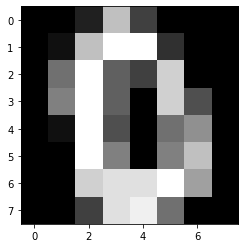

In [3]:
### Your code for 3.1 goes here ###
print(X_img_vec.shape)
plt.gray()
plt.imshow(X_img_vec[15].reshape(8, 8));

## 3.2

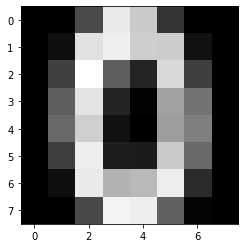

In [11]:
### Your code for 3.2 goes here ###
scaler = sklpp.StandardScaler(with_mean = True, with_std = False)
X_image_cent = scaler.fit_transform(X_img_vec)
image_means = scaler.mean_.reshape(8, 8)
plt.imshow(image_means);
# image_means

## 3.3

In [12]:
### Your code for 3.3 goes here ###
U_img, E_img, V_T_img = np.linalg.svd(X_image_cent)
V_img = np.transpose(V_T_img)

## 3.4

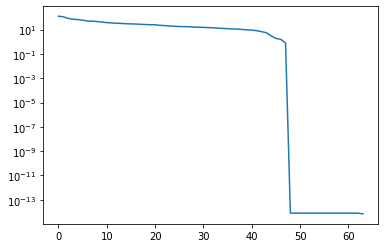

In [13]:
### Your code for 3.4 goes here ###
plt.yscale("log")
plt.plot(E_img);

## 3.5

In [14]:
### Your code for 3.5 goes here ###
total_energy = 0
for sval in E_img:
  total_energy = total_energy + (sval**2)

k = 0
pve = 0
for kval in E_img:
  pve = pve + (kval**2)
  k += 1
  if (pve >= (0.9*total_energy)): break

print(k)
print(pve)
print(total_energy)

18
63873.42667528412
70550.37640449432


## 3.6

In [15]:
### Your code for 3.6 goes here ###
image_pca = skldecomp.PCA(n_components=0.90, svd_solver='full')
k_skl = image_pca.fit(X_image_cent)
k_skl.n_components_

18

## 3.7

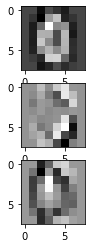

In [22]:
### Your code for 3.7 goes here ###
fig, axs = plt.subplots(3)
axs[0].imshow(k_skl.components_[0].reshape(8, 8))
axs[1].imshow(k_skl.components_[1].reshape(8, 8))
axs[2].imshow(k_skl.components_[2].reshape(8, 8))
plt.show();

## 3.8

In [23]:
### Your code for 3.8 goes here ###
k_pca = skldecomp.PCA(n_components=3, svd_solver='full')
k_fit = k_pca.fit(X_image_cent)
Xf_image = np.transpose(k_pca.transform(X_image_cent))
Xf_image.shape

(3, 178)

## 3.9

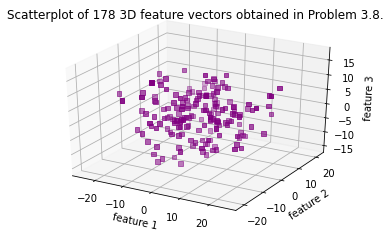

In [24]:
### Your code for 3.9 goes here ###
fig = plt.figure()

# original data matrix
ax = fig.add_subplot(111, projection='3d')

X = Xf_image[0]
Y = Xf_image[1]
Z = Xf_image[2]

surf1 = ax.scatter(X, Y, Z, c='purple', marker="s", label='original datapoints')
plt.title('Scatterplot of 178 3D feature vectors obtained in Problem 3.8.')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

plt.show();

## 3.10

In [25]:
### Your code for 3.10 goes here ###
X_img_proj = k_pca.inverse_transform(np.transpose(Xf_image))
mean_vec = np.tile(np.transpose(scaler.mean_), (178, 1))
X_img_proj = np.add(X_img_proj, mean_vec)
X_img_proj.shape

(178, 64)

## 3.11

In [26]:
### Your code for 3.11 goes here ###
error_image = np.linalg.norm(np.subtract(X_img_vec, X_img_proj), 'fro') ** 2
error_image/178

202.52814947043325

In [27]:
_, svals, _ = np.linalg.svd(X_image_cent)
error_svals = 0
for s in svals[3:]:
  error_svals += s**2
error_svals/178

202.5281494704331

## 3.12

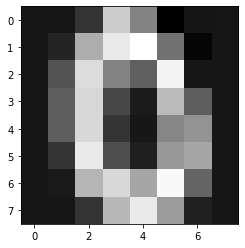

In [28]:
### Your code for 3.12 goes here ###
plt.gray()
plt.imshow(X_img_proj[15].reshape(8, 8));

# **4. PCA as a Denoising Tool**

## 4.1

In [32]:
### Your code for 4.1 goes here ###
a = np.random.randn(3, 1)
a

array([[-0.07331779],
       [ 1.01549675],
       [-1.45591531]])

## 4.2

In [33]:
### Your code for 4.2 goes here ###
X_4 = np.zeros([100, 3])

for ctr in range(100):
  b_i = np.random.normal(0, 2)
  x1 = b_i*a[0, 0]
  x2 = b_i*a[1, 0]
  x3 = b_i*a[2, 0]

  X_4[ctr, 0] = x1
  X_4[ctr, 1] = x2
  X_4[ctr, 2] = x3

X_4_T = np.transpose(X_4)

## 4.3

In [34]:
### Your code for 4.3 goes here ###
n = np.random.normal(0, np.sqrt(0.05), size=(1, 3))
Y = np.zeros_like(X_4)
for i in range(X_4.shape[0]):
  Y[i, :] = np.add(X_4[i, :], n)
Y.shape

(100, 3)

## 4.4

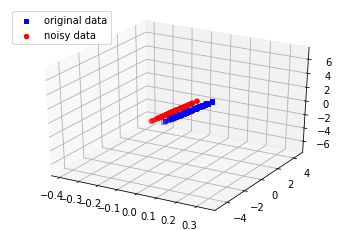

In [35]:
### Your code for 4.4 goes here ###
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y_T = np.transpose(Y)

X_org = X_4_T[0]
Y_org = X_4_T[1]
Z_org = X_4_T[2]

X_n = Y_T[0]
Y_n = Y_T[1]
Z_n = Y_T[2]

ax.scatter(X_org, Y_org, Z_org, c='b', marker="s", label='original data')
ax.scatter(X_n, Y_n, Z_n, c='r', marker="o", label='noisy data')
plt.legend(loc='upper left')
plt.show();

## 4.5

In [36]:
### Your code for 4.5 goes here ###
U_n, E_n, V_n_T = np.linalg.svd(Y)
V_n = np.transpose(V_n_T)
Vk_n = V_n[:, 0:1]

Yf = np.matmul(np.transpose(Vk_n), Y_T)
X_denoised = np.matmul(Vk_n, Yf)
X_denoised.shape

(3, 100)

## 4.6

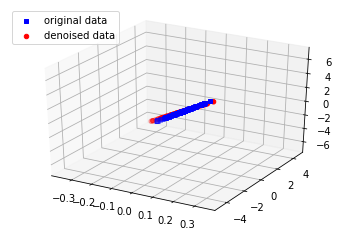

In [37]:
### Your code for 4.6 goes here ###
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y_T = np.transpose(Y)

X_org = X_4_T[0]
Y_org = X_4_T[1]
Z_org = X_4_T[2]

X_n = X_denoised[0]
Y_n = X_denoised[1]
Z_n = X_denoised[2]

ax.scatter(X_org, Y_org, Z_org, c='b', marker="s", label='original data')
ax.scatter(X_n, Y_n, Z_n, c='r', marker="o", label='denoised data')
plt.legend(loc='upper left')
plt.show();

## 4.7

In [38]:
### Your code for 4.7 goes here ###
error_noisy = (np.linalg.norm(np.subtract(X_4, Y), 'fro') ** 2) / 100
error_denoised = (np.linalg.norm(np.subtract(X_4, np.transpose(X_denoised)), 'fro') ** 2) / 100

print(f'average error per noisy sample = {error_noisy}')
print(f'average error per denoised sample = {error_denoised}')

average error per noisy sample = 0.10623236966801221
average error per denoised sample = 0.06287342913904287


## 4.8

_[Your answer for 4.8 goes here]_

This section of the exercise shows how PCA can be used to denoise data. Problem 4.7 shows that average error per sample is considerably less for the denoised data, i.e. it is possible to recover original data from added noise by using PCA. That said, it is also evident that PCA is not a perfect technique as there is still >0 error in the denoised data.